## Suicide Rate Overview in Brazil

Every year, more than 12k people finish off your own life's in Brazil. In the world scenario this number is more than 1 million. This fact make the suicide become a public health problem and for that,  many iniciatives from goverment were created. One of there is the Yellow September,  created by Brazilian Psychiatric Association (ABP) in partnership with the Federal Council of Medicine (CFM)

In this study I will show some analysis about the data and make some insights about the problem. Feel comfortable to copy the notebook and make your own analysis.  

## Description of Data

This dataset is hosted in [that page](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016), is a compile of various datasets since 1985 at 2016, and bring info about many countries. I start the analysis making the import of some libraries that I use.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/suicide_rates_overview/master.csv")

## Variables Dictionary:

### This dataset has 12 columns with the content below.

- **country:** country where the data has collected
  - 101 países
- **year:** year when the data has registered
  - 1987 a 2016
- **sex:** sex considered on the registries
  - male
  - female
- **age:** age range considered on the registries
  - 5-14 years old
  - 15-24 years old
  - 25-34 years old
  - 35-54 years old
  - 55-74 years old
  - 75+ years old
- **suicides_no:** total occurancy of suicides
- **opulation:** group population
- **suicides/100k pop:** number of suicides per 100k inhabitants 
- **country_year:** id count country + year
- **HDI for year:** Human Development Index per year
- **gdp_for_year:** Gross Domestic Product per year
- **gdp_per_capita:** Gross Domestic Product per capita

## Exploratory Data Analysis 

This data have a previous treatment made from the team has provided it. Dataset has 12 columns and 27.820 rows. Below we encounter a simple analysis to exploration the data and make our first insights about the subject.

In [3]:
print("Dataframe Shape: ", df.shape)

# First 5 rows
df.head()

Dataframe Shape:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The first thing to do is group cases by a specific country, in that case Brazil, that is make more easy to create our analysis.

In [6]:
# extract the brazilian data
df_brazil = df[df.country == "Brazil"].copy()

# The new dataframe
print("Dataframe Shape: ", df_brazil.shape)

# five rows of the new dataframe
df_brazil.head()

Dataframe Shape:  (372, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Below we see that HDI variable has a lot of null values, make that variable useless for our analysis. If we decided use that information that is necessary to search in others sources of data. 

In [7]:
print("--> World:")
display(df.isnull().sum())

print("\n", "--." * 10, "\n")

# velores ausentes nos dados do Brasil
print("--> Brazil:")
display(df_brazil.isnull().sum())


--> World:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Brazil:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

## The suicide rate tendencies in Brazil

Initially we compare the rate of suicide in 100k inhabitants at world and Brazil. This strategy is a better approach because the population grown a lot since 1985 to 2015.

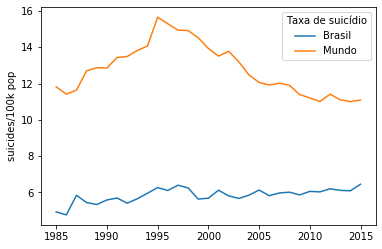

In [8]:
# the mean of world and brazil
years = df_brazil.year.unique() 
suicides_brazil_mean = df_brazil.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

# Brazil do not have the year 2016, so we eliminate it  from world dataframe.
suicides_world_mean.drop(2016, inplace=True)

# plot comparisons from Brazil and World
ax = sns.lineplot(x=years, y=suicides_brazil_mean, label='Brasil')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

One thing is easily observation in the graphs above. Despite the suicide rate in Brazil is minor then a World mean, the rate is grown.

The orange line peaked around 1995, but reversed the slope and has been falling year after year. The blue line (Brazil) has a positive slope practically throughout the analyzed period.

## Age group with the highest rate of suicide
Below, I created a pivot table to analyze the 6 age groups according to the year and the number of suicides per 100 thousand inhabitants.

My main objective here is to identify the age group that has the highest representation among those who take their own lives, and to identify if there has been any change in the profile over 30 years.

In [9]:
# create a pivot table
table = pd.pivot_table(df_brazil, values='suicides_no', index=['year'], columns=['age'])

# sort the tables to leave in ascending order
column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

# see the first 5 pivot table entries
table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


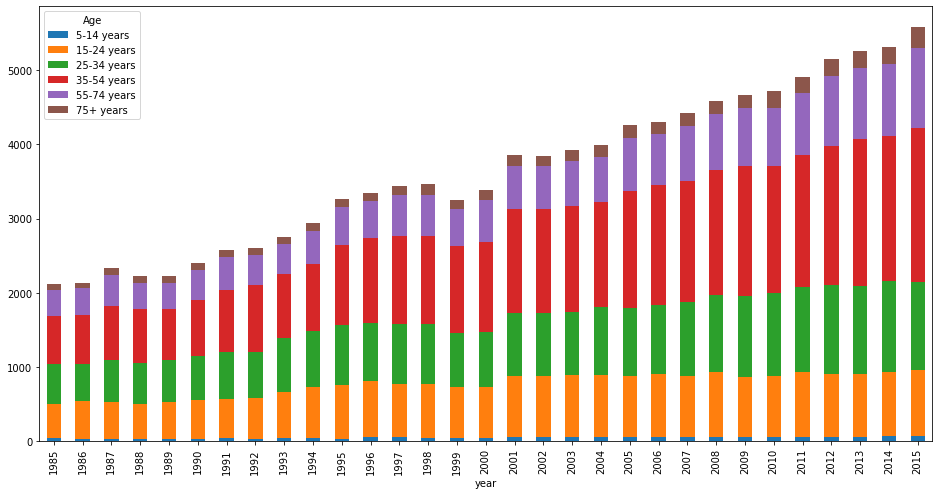

In [11]:
# plot the age group pivot table
table.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Age");

Even visually, it is easy to identify that the group of people who most commit suicide is between 35-54 years old. Second, there are people between 25-34 years old.

Together, these two groups account for almost 60% of the database records.

In [12]:
# suicide statistics by age group
table[['25-34 years']].loc[2015]
table.loc[2015] / table.loc[2015].sum()

age
5-14 years     0.012094
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

Another point worth mentioning is the increase in cases among people over 55. In 1985, older people represented a small slice of the total number.

However, in 2015 it is clear that even for people over 75 years old there was a significant increase in the number of suicides.

In order to infer the cause of this change in pattern, it is necessary to evaluate more deeply issues that go beyond numbers (for example, qualitative factors, the country's economic moment and the dominant culture of each era).

## Suicide rate between men and women
Another analysis of great importance is to see the percentage of suicides between men and women.

Analyzing the entire period, the dataset used showed that approximately 78% of cases were committed by men and 22% of them by women. We chose to take the average of 30 years, as there was no significant change in this behavior during the period.

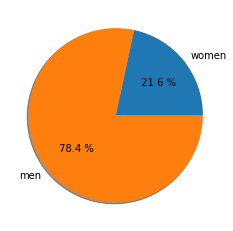

In [13]:
# extracting values between men and women
men_women = df_brazil.groupby('sex').suicides_no.sum()/df_brazil.groupby('sex').suicides_no.sum().sum()

# plot the pie chart
plt.pie(men_women, labels = ['women', 'men'], autopct = '% 1.1f %%', shadow = True);

## Correlations between GDP, HDI and number of suicides
By creating a correlation matrix and plotting a heatmap, it appears that the increase in GDP per capita did not decrease the number of suicides per 100 thousand inhabitants. In fact, it has remained stable, contrary to the common sense of most people.

Regarding the HDI, as previously mentioned, there are many values missing in the cells, which can give an incorrect or biased interpretation.

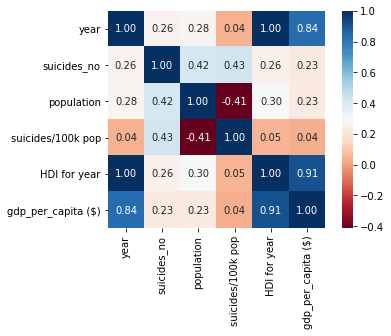

In [14]:
# plotar heatmap
corr = df_brazil.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

The proposal of this study is show how the Data Science has the possibility of use in real cases and create insights to solve real problems.